# DataPreprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('final_data.csv')

In [3]:
df.head()

,Unnamed: 0,category,description,keywords
0,0,crime,there were 2 mass shootings in texas last week...,"(mass shootings, texas, week, left, husband, k..."
1,1,entertainment,will smith joins diplo and nicky jam for the 2...,"(diplo, nicky jam, world cup's, official, song..."
2,2,entertainment,hugh grant marries for the first time at age 5...,"(age, actor, longtime girlfriend anna eberstei..."
3,3,entertainment,jim carrey blasts 'castrato' adam schiff and d...,"(jim carrey blasts, democrats, artwork, actor,..."
4,4,entertainment,julianna margulies uses donald trump poop bags...,"(julianna, margulies, dog, actress, bags, cath..."


In [4]:
df.shape

(200853, 4)

In [5]:
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 28
politics          32739
entertainment     21233
wellness          17827
parents           14033
style & beauty    11903
travel             9887
worldpost          8420
food & drink       8322
healthy living     6694
queer voices       6314
business           5937
good news          5049
sports             4884
black voices       4528
tech               4260
home & living      4195
environment        3945
arts               3878
women              3490
impact             3459
divorce            3426
crime              3405
media              2815
weird news         2670
religion           2556
education          2148
money              1707
latino voices      1129
Name: category, dtype: int64



In [15]:
l1 = df['category'].value_counts()

In [19]:
l1[1]

21233

In [23]:
l2 = []
for i in range(len((df['category'].value_counts()))):
    l2.append(l1[i])

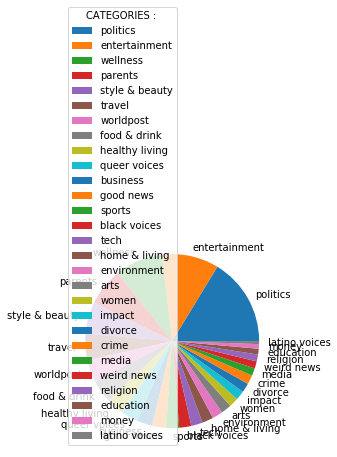

In [50]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array(l2)
mylabels = ["politics","entertainment","wellness","parents","style & beauty","travel","worldpost","food & drink","healthy living","queer voices","business","good news","sports","black voices","tech","home & living","environment","arts","women","impact","divorce","crime","media","weird news","religion","education","money","latino voices"]
#myexplode = [0.2, 0, 0, 0]

plt.pie(y,labels = mylabels)
plt.legend(loc = 'lower left', title = "CATEGORIES : ")
plt.show()

In [38]:
len(l2)
mylabels = ["politics" , "entertainment" , "wellness" , "parents" , "style & beauty" , "travel" , "worldpost" ,"food & drink","healthy living","queer voices","business","good news","sports","black voices","tech","home & living","environment","arts","women","impact","divorce","crime","media","weird news","religion","education","money","latino voices"]

In [6]:
#deleting unwanted categories

df.drop(df[df['category'] == 'impact'].index, inplace = True)
df.drop(df[df['category'] == 'weird news'].index, inplace = True)
df.drop(df[df['category'] == 'good news'].index, inplace = True)
df.drop(df[df['category'] == 'wellness'].index, inplace = True)
df.drop(df[df['category'] == 'parents'].index, inplace = True)
df.drop(df[df['category'] == 'queer voices'].index, inplace = True)
df.drop(df[df['category'] == 'media'].index, inplace = True)
df.drop(df[df['category'] == 'latino voices'].index, inplace = True)
df.drop(df[df['category'] == 'divorce'].index, inplace = True)
df.drop(df[df['category'] == 'women'].index, inplace = True)
df.drop(df[df['category'] == 'black voices'].index, inplace = True)
df.drop(df[df['category'] == 'crime'].index, inplace = True)

In [7]:
#merging more categories

df.category[df.category=='style & beauty'] = 'lifestyle'
df.category[df.category=='home & living'] = 'lifestyle'
df.category[df.category=='healthy living'] = 'lifestyle'
df.category[df.category=='money'] = 'business'
df.category[df.category=='worldpost'] = 'international'
df.category[df.category=='education'] = 'tech'
df.category[df.category=='tech'] = 'education/Tech/science'
df.category[df.category=='religion'] = 'arts'
df.category[df.category=='arts'] = 'art/culture'


In [8]:
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  32739
lifestyle                 22792
entertainment             21233
travel                     9887
international              8420
food & drink               8322
business                   7644
art/culture                6434
education/Tech/science     6408
sports                     4884
environment                3945
Name: category, dtype: int64



In [9]:
#deleting rows with Null values
df.dropna(inplace=True)

In [10]:
#reseting index numbers
df.reset_index(inplace=True)

In [11]:
#checking remaining categories

mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
NUM_CLASSES = len(LABEL_MAPPING)
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  29578
lifestyle                 20661
entertainment             17887
travel                     9408
food & drink               8157
international              7081
business                   6783
education/Tech/science     5669
art/culture                5078
sports                     4221
environment                3367
Name: category, dtype: int64



Cleaning rows by removing extra characters from keywords column and adding clean data to plot column

In [12]:
#creating column named plot

df['plot']=np.nan

In [13]:
a=df['keywords']
b=df['plot']


In [14]:
import re

In [15]:
#remove extra characters except alphabets
for i in range(len(a)):
    try:
        b[i]=re.sub('[^A-Za-z]+', ' ', a[i])
    except KeyError:
        pass

<ipython-input-15-033ff009f3ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b[i]=re.sub('[^A-Za-z]+', ' ', a[i])
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
df.dropna(inplace=True)

In [17]:
#checking remaining categories

mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
NUM_CLASSES = len(LABEL_MAPPING)
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
politics                  29578
lifestyle                 20661
entertainment             17887
travel                     9408
food & drink               8157
international              7081
business                   6783
education/Tech/science     5669
art/culture                5078
sports                     4221
environment                3367
Name: category, dtype: int64



getting equal rows for all categories for uniformityin data i.e. getting 3367 rows on each category

In [18]:
dfs = []

# loop through each category and get 3367 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(3367))
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

,index,category,description,keywords,plot
0,36956,politics,number of sanctuary congregations doubles sinc...,"(sanctuary, congregations, doubles, ’s electio...",sanctuary congregations doubles s election mo...
1,40229,politics,trump and russia: will anything be done? it is...,"(russia, apparent, russia's, election, stories...",russia apparent russia s election stories att...
2,85246,entertainment,kylie jenner dons a bra top & sheer skirt to '...,"(kylie jenner, skirt, paper towns', screening,...",kylie jenner skirt paper towns screening invi...
3,122674,art/culture,street photography in stockholm (pt. 2) i want...,"(street photography, quenches, authenticity, p...",street photography quenches authenticity pers...
4,180230,travel,the difference between inner and outer mongoli...,"(inner, outer mongolia, photos, flight, boston...",inner outer mongolia photos flight boston cap...


In [19]:
mapping = dict(enumerate(df['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
NUM_CLASSES = len(LABEL_MAPPING)
print(f"""
Category count: {len(df['category'].value_counts())}
{df['category'].value_counts()}
""")


Category count: 11
business                  3367
travel                    3367
lifestyle                 3367
politics                  3367
sports                    3367
entertainment             3367
education/Tech/science    3367
international             3367
art/culture               3367
environment               3367
food & drink              3367
Name: category, dtype: int64



In [20]:
#deleting empty rows
df.dropna(inplace=True)

Convert DataFrame to csv for future use

In [21]:
df.to_csv('ML_data.csv')